In [1]:
import autoencoderProject

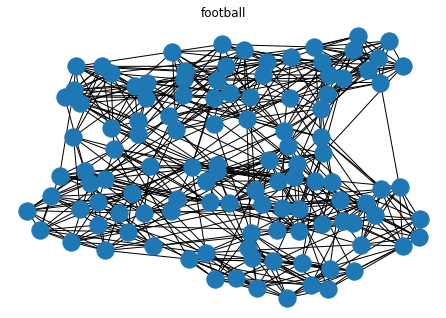

In [51]:
# Loading required datasets
datasets={
    '0':'karate',
    '1':'football',
    '2':'polbooks',
    '3':'dolphin',
    '4':'lfr 0.1',
    '5':'lfr 0.3',
    '6':'lfr 0.5',
}
choice = input("Enter your choice (0-6):")
G_data,B_data=autoencoderProject.load_dataset(datasets[choice])
autoencoderProject.drawDataset(G_data,datasets[choice])

In [52]:
hidden_layers={
    '0':[32,16],
    '1':[64,32],
    '2':[64,32,16],
    '3':[32,16],
    '4':[64,32,16],
    '5':[64,32,16],
    '6':[64,32]
}

epoch_per_layer={
    '0':[200,200],
    '1':[200,200,200],
    '2':[64,32,16],
    '3':[32,16],
    '4':[200,100,100],
    '5':[200,300,200],
    '6':[400,200]
}



epoch : 1/200, recon loss = 0.09105235
epoch : 2/200, recon loss = 0.08925215
epoch : 3/200, recon loss = 0.08762473
epoch : 4/200, recon loss = 0.08614003
epoch : 5/200, recon loss = 0.08476959
epoch : 6/200, recon loss = 0.08348770
epoch : 7/200, recon loss = 0.08227153
epoch : 8/200, recon loss = 0.08110132
epoch : 9/200, recon loss = 0.07996034
epoch : 10/200, recon loss = 0.07883458
epoch : 11/200, recon loss = 0.07771261
epoch : 12/200, recon loss = 0.07658534
epoch : 13/200, recon loss = 0.07544589
epoch : 14/200, recon loss = 0.07428950
epoch : 15/200, recon loss = 0.07311342
epoch : 16/200, recon loss = 0.07191688
epoch : 17/200, recon loss = 0.07070103
epoch : 18/200, recon loss = 0.06946877
epoch : 19/200, recon loss = 0.06822457
epoch : 20/200, recon loss = 0.06697425
epoch : 21/200, recon loss = 0.06572456
epoch : 22/200, recon loss = 0.06448276
epoch : 23/200, recon loss = 0.06325600
epoch : 24/200, recon loss = 0.06205079
epoch : 25/200, recon loss = 0.06087236
epoch : 2

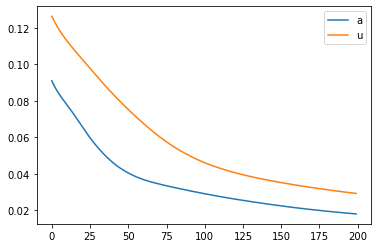

Index:0	Max NMI till now:0.9241952287164277
Index:20	Max NMI till now:0.9333789664252511
Index:20	Max NMI till now:0.9333789664252511
Index:20	Max NMI till now:0.9333789664252511
Index:20	Max NMI till now:0.9333789664252511
Index:20	Max NMI till now:0.9333789664252511
Index:20	Max NMI till now:0.9333789664252511
Index:20	Max NMI till now:0.9333789664252511
Index:20	Max NMI till now:0.9333789664252511
Index:20	Max NMI till now:0.9333789664252511
Index:20	Max NMI till now:0.9333789664252511
20


In [53]:
encoder=autoencoderProject.fit_dataset(B_data,hidden_layers=hidden_layers[choice],epoch_per_layer=epoch_per_layer[choice])
r_state=autoencoderProject.calcMaxState(G_data, B_data, datasets[choice], encoder)
print(r_state)

In [54]:
import matplotlib.pyplot as plt
import numpy as np

In [55]:
original_nmi=autoencoderProject.compute_results(G_data,B_data,datasets[choice],encoder,only_kmeans=True)
optimized_nmi=autoencoderProject.compute_results(G_data,B_data,datasets[choice],encoder,r_state=r_state)

NMI when applying only kmeans:0.8924%
NMI on applying autoencoder:0.9334%
Improvement upon kmeans:4.1%


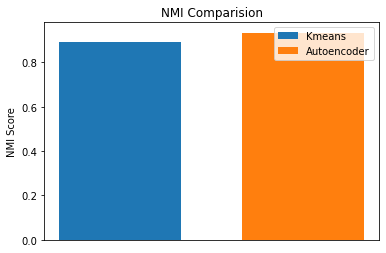

In [56]:
print("NMI when applying only kmeans:{:.4f}%".format(original_nmi))
print("NMI on applying autoencoder:{:.4f}%".format(optimized_nmi))
print("Improvement upon kmeans:{:.1f}%".format((optimized_nmi-original_nmi)*100))
fig, ax = plt.subplots()
labels=['Kmeans','Autoencoder']
x = np.arange(1)
width=0.25
rects1 = ax.bar(x + 0.0, original_nmi, width, label=labels[0])
rects2 = ax.bar(x + 0.375, optimized_nmi, width, label=labels[1])
ax.set_ylabel('NMI Score')
ax.set_title('NMI Comparision')
plt.xticks([])
ax.legend()
plt.show()